In [1]:
# Using test environment unless noted otherwise

import sys
sys.path.append('..') 

import numpy as np

from time import time
import matplotlib.pyplot as plt

from plaingaussian.normal import normal, join, Normal


# Simple operations on random variables

In [2]:
a = np.array([1.])
b = np.array(0.)

%timeit xi = normal()  # Instantiation
%timeit xi = Normal(a, b)  # Raw instantiation

5.65 µs ± 199 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.86 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [3]:
# Multiplication of a scalar variable by a number

xi = normal()

flo = 0.1
arr = np.array(flo)
arr1 = np.array([flo])

%timeit flo * xi
%timeit arr * xi
%timeit arr1 * xi  # This is slower because of broadcasting

3.83 µs ± 188 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.57 µs ± 126 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.01 µs ± 636 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
# Multiplication of a vector variable by a number

xi = normal(size=1000)

flo = 0.1
arr = np.array(flo)
arr1 = np.array([flo])

%timeit flo * xi
%timeit arr * xi
%timeit arr1 * xi

4.11 ms ± 538 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.6 ms ± 524 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.35 ms ± 473 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
# Right and left multiplications of scalar variables by sequences

xi = normal()

n = 1000

li = [0.1 for _ in range(n)]
tu = tuple(li)
arr = np.array(li)

%timeit li * xi
%timeit tu * xi
%timeit arr * xi

176 µs ± 6.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
174 µs ± 5.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
7.83 µs ± 692 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
# Evement-wise operations on two scalar normals

xi1, xi2 = normal(), normal()
%timeit xi1 + xi2
%timeit xi1 * xi2

22.2 µs ± 2.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
23.9 µs ± 967 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
# Evement-wise operations on two array normals

sz = (20, 50, 5)

xi1, xi2 = normal(size=sz), normal(size=sz)
%timeit xi1 + xi2
%timeit xi1 * xi2

302 ms ± 21.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
480 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
x = np.zeros((200, 500, 5))
y = np.ones((5,))

%timeit np.broadcast(x, y)
%timeit x + y

751 ns ± 25 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.86 ms ± 443 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
# Evement-wise operations on two array normals with broadcasting

sz1 = (20, 5, 5)
sz2 = (5,)

xi1, xi2 = normal(size=sz1), normal(size=sz2)
%timeit xi1 + xi2
%timeit xi1 * xi2

730 µs ± 52.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.97 ms ± 85.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
# Pure dense array multiplication time

ar1 = np.random.rand(20*5*5, 20, 5, 5)
ar2 = np.random.rand(5, 5)

%timeit ar1 * ar2

962 µs ± 71.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
# Inverting the order of sizes of the elementary arrays
sz1 = (10, 5, 5)
sz2 = (5,)

xi1, xi2 = normal(size=sz1), Normal(np.ones((500, 5)), np.zeros((5,)))
%timeit xi1 + xi2
%timeit xi1 * xi2

1.05 ms ± 44.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.57 ms ± 49.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Random walks

nstep 5000
nsample 1000
 time: 0.864 : random walk
 time: 2.446 : stacking
 time: 0.794 : sampling


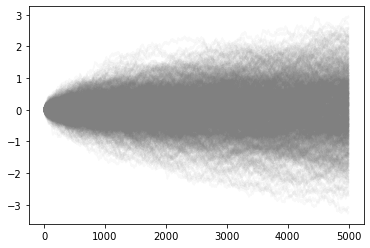

In [14]:
nstep = 5 * 10**3
nsample = 10**3

print(f"nstep {nstep}")
print(f"nsample {nsample}")

t1 = time()

x = [0] * (nstep + 1)
for i in range(nstep):
    x[i+1] = x[i] + normal(0, 1/nstep)

print(f" time: {(time()-t1):.3f} : random walk")

t1 = time()
xs = join(x)
print(f" time: {(time()-t1):.3f} : stacking")

t1 = time()
samples = xs.sample(nsample)
print(f" time: {(time()-t1):.3f} : sampling")

plt.plot(samples.T, alpha=0.05, color='gray');

nstep 500
nsample 1000
 time: 0.440 : random walk
 time: 0.065 : stacking
 time: 0.059 : sampling


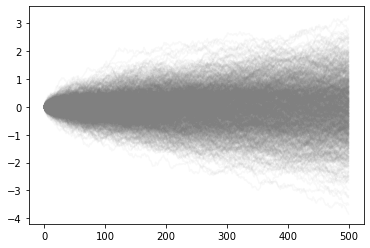

In [16]:
# Random walk - smaller

nstep = 5 * 10**2
nsample = 10**3

print(f"nstep {nstep}")
print(f"nsample {nsample}")

t1 = time()

x = [0] * (nstep + 1)
for i in range(nstep):
    x[i+1] = x[i] + normal() / np.sqrt(nstep)

print(f" time: {(time()-t1):.3f} : random walk")

t1 = time()
xs = join(x)
print(f" time: {(time()-t1):.3f} : stacking")

t1 = time()
samples = xs.sample(nsample)
print(f" time: {(time()-t1):.3f} : sampling")

plt.plot(samples.T, alpha=0.05, color='gray');

nstep 500
nsample 1000
 time: 0.034 : random walk
 time: 0.383 : stacking
 time: 0.038 : sampling


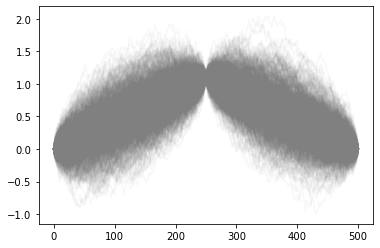

In [17]:
# Conditional random walk

nstep = 5 * 10**2
nsample = 10**3

print(f"nstep {nstep}")
print(f"nsample {nsample}")

t1 = time()

x = [0] * (nstep + 1)
for i in range(nstep):
    x[i+1] = x[i] + (1/np.sqrt(nstep)) * normal()

print(f" time: {(time()-t1):.3f} : random walk")

t1 = time()
xs = join(x) | {x[-1]: 0, x[nstep//2]: 1.1}
print(f" time: {(time()-t1):.3f} : stacking")

t1 = time()
samples = xs.sample(nsample)
print(f" time: {(time()-t1):.3f} : sampling")

plt.plot(samples.T, alpha=0.05, color='gray');

nstep 5000
nsample 1000
 time: 0.187 : generation
 time: 0.157 : generation of np.array's only
 time: 0.687 : sampling


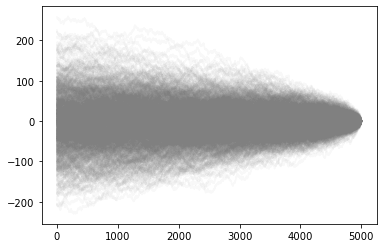

In [19]:
# Manual construction of the random variable - should be the fastest

nstep = 5 * 10**3
nsample = 10**3

print(f"nstep {nstep}")
print(f"nsample {nsample}")

t1 = time()
xs = Normal(a=np.tril(np.ones((nstep, nstep))), b=np.zeros(nstep))
print(f" time: {(time()-t1):.3f} : generation")

t1 = time()
(np.tril(np.ones((nstep, nstep))), np.zeros(nstep))
print(f" time: {(time()-t1):.3f} : generation of np.array's only")

t1 = time()
samples = xs.sample(nsample)
print(f" time: {(time()-t1):.3f} : sampling")

plt.plot(samples.T, alpha=0.05, color='gray');